FISTA CBPDN Solver
==================

This example demonstrates use of a FISTA solver for a convolutional sparse coding problem with a colour dictionary and a colour signal [[30]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional) [[17]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_{c,m} * \mathbf{x}_m -\mathbf{s}_c \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_m \|_1 \;,$$

where $\mathbf{d}_{c,m}$ is channel $c$ of the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_m$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.fista import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load colour dictionary and display it.

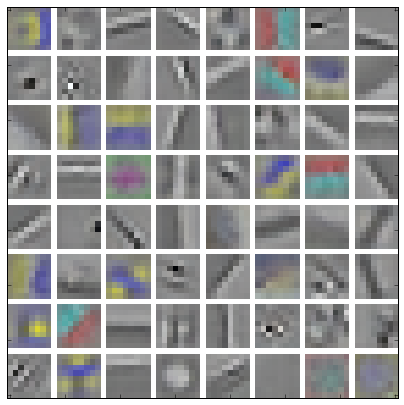

In [4]:
D = util.convdicts()['RGB:8x8x3x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [fista.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/sporco.fista.cbpdn.html#sporco.fista.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 1e-1
L = 1e2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 250,
            'RelStopTol': 8e-5, 'L': L, 'BackTrack': {'Enabled': True }})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  2.72e+02  2.38e+02  3.37e+02  3.26e-01  7.87e+06  2.25e+07      0  1.00e+03


   1  2.01e+02  1.51e+02  4.96e+02  8.82e-02  5.01e+06  9.33e+06      0  1.00e+03


   2  1.65e+02  1.04e+02  6.08e+02  2.54e-02  3.46e+06  4.83e+06      0  1.00e+03


   3  1.46e+02  7.79e+01  6.80e+02  9.88e-03  2.58e+06  3.12e+06      0  1.00e+03
   4  1.34e+02  6.17e+01  7.24e+02  5.11e-03  2.05e+06  2.30e+06      0  1.00e+03


   5  1.26e+02  5.13e+01  7.51e+02  3.13e-03  1.70e+06  1.84e+06      0  1.00e+03
   6  1.21e+02  4.43e+01  7.66e+02  2.16e-03  1.47e+06  1.55e+06      0  1.00e+03


   7  1.17e+02  3.95e+01  7.72e+02  1.63e-03  1.31e+06  1.36e+06      0  1.00e+03


   8  1.13e+02  3.61e+01  7.74e+02  1.32e-03  1.20e+06  1.23e+06      0  1.00e+03


   9  1.11e+02  3.36e+01  7.72e+02  1.11e-03  1.12e+06  1.14e+06      0  1.00e+03


  10  1.08e+02  3.17e+01  7.68e+02  9.57e-04  1.05e+06  1.07e+06      0  1.00e+03


  11  1.06e+02  3.03e+01  7.62e+02  8.41e-04  1.01e+06  1.02e+06      0  1.00e+03


  12  1.05e+02  2.91e+01  7.56e+02  7.48e-04  9.69e+05  9.83e+05      0  1.00e+03


  13  1.03e+02  2.82e+01  7.50e+02  6.68e-04  9.38e+05  9.51e+05      0  1.00e+03


  14  1.02e+02  2.74e+01  7.43e+02  5.97e-04  9.13e+05  9.24e+05      0  1.00e+03


  15  1.00e+02  2.68e+01  7.37e+02  5.43e-04  8.92e+05  9.02e+05      0  1.00e+03


  16  9.93e+01  2.63e+01  7.31e+02  4.91e-04  8.75e+05  8.83e+05      0  1.00e+03


  17  9.83e+01  2.58e+01  7.25e+02  4.52e-04  8.59e+05  8.68e+05      0  1.00e+03


  18  9.73e+01  2.54e+01  7.19e+02  4.12e-04  8.46e+05  8.53e+05      0  1.00e+03


  19  9.64e+01  2.50e+01  7.14e+02  3.81e-04  8.34e+05  8.41e+05      0  1.00e+03


  20  9.56e+01  2.47e+01  7.08e+02  3.50e-04  8.24e+05  8.30e+05      0  1.00e+03


  21  9.48e+01  2.45e+01  7.03e+02  3.25e-04  8.14e+05  8.20e+05      0  1.00e+03


  22  9.41e+01  2.42e+01  6.99e+02  3.07e-04  8.06e+05  8.12e+05      0  1.00e+03


  23  9.34e+01  2.40e+01  6.94e+02  2.83e-04  7.98e+05  8.03e+05      0  1.00e+03


  24  9.28e+01  2.38e+01  6.90e+02  2.62e-04  7.91e+05  7.96e+05      0  1.00e+03


  25  9.22e+01  2.36e+01  6.86e+02  2.44e-04  7.85e+05  7.89e+05      0  1.00e+03


  26  9.16e+01  2.34e+01  6.82e+02  2.32e-04  7.79e+05  7.83e+05      0  1.00e+03


  27  9.11e+01  2.32e+01  6.79e+02  2.18e-04  7.74e+05  7.78e+05      0  1.00e+03


  28  9.06e+01  2.31e+01  6.75e+02  2.09e-04  7.69e+05  7.72e+05      0  1.00e+03


  29  9.02e+01  2.29e+01  6.72e+02  1.93e-04  7.64e+05  7.67e+05      0  1.00e+03


  30  8.97e+01  2.28e+01  6.69e+02  1.82e-04  7.59e+05  7.63e+05      0  1.00e+03


  31  8.93e+01  2.27e+01  6.66e+02  1.75e-04  7.55e+05  7.58e+05      0  1.00e+03


  32  8.89e+01  2.26e+01  6.63e+02  1.64e-04  7.51e+05  7.54e+05      0  1.00e+03


  33  8.85e+01  2.24e+01  6.61e+02  1.55e-04  7.48e+05  7.51e+05      0  1.00e+03


  34  8.82e+01  2.23e+01  6.58e+02  1.48e-04  7.44e+05  7.47e+05      0  1.00e+03


  35  8.78e+01  2.22e+01  6.56e+02  1.41e-04  7.41e+05  7.44e+05      0  1.00e+03


  36  8.75e+01  2.22e+01  6.53e+02  1.34e-04  7.38e+05  7.41e+05      0  1.00e+03


  37  8.72e+01  2.21e+01  6.51e+02  1.29e-04  7.35e+05  7.38e+05      0  1.00e+03


  38  8.69e+01  2.20e+01  6.49e+02  1.21e-04  7.33e+05  7.35e+05      0  1.00e+03


  39  8.66e+01  2.19e+01  6.47e+02  1.16e-04  7.30e+05  7.32e+05      0  1.00e+03


  40  8.63e+01  2.18e+01  6.45e+02  1.12e-04  7.28e+05  7.30e+05      0  1.00e+03


  41  8.61e+01  2.18e+01  6.43e+02  1.08e-04  7.25e+05  7.27e+05      0  1.00e+03


  42  8.58e+01  2.17e+01  6.41e+02  1.05e-04  7.23e+05  7.25e+05      0  1.00e+03


  43  8.56e+01  2.16e+01  6.39e+02  9.89e-05  7.21e+05  7.22e+05      0  1.00e+03


  44  8.53e+01  2.16e+01  6.38e+02  9.52e-05  7.19e+05  7.20e+05      0  1.00e+03


  45  8.51e+01  2.15e+01  6.36e+02  8.82e-05  7.17e+05  7.18e+05      0  1.00e+03


  46  8.49e+01  2.15e+01  6.34e+02  8.52e-05  7.15e+05  7.16e+05      0  1.00e+03


  47  8.47e+01  2.14e+01  6.33e+02  8.39e-05  7.13e+05  7.15e+05      0  1.00e+03


  48  8.45e+01  2.14e+01  6.31e+02  8.13e-05  7.12e+05  7.13e+05      0  1.00e+03


  49  8.43e+01  2.13e+01  6.30e+02  7.78e-05  7.10e+05  7.11e+05      0  1.00e+03
---------------------------------------------------------------------------------
ConvBPDN solve time: 12.72s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 36.64dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

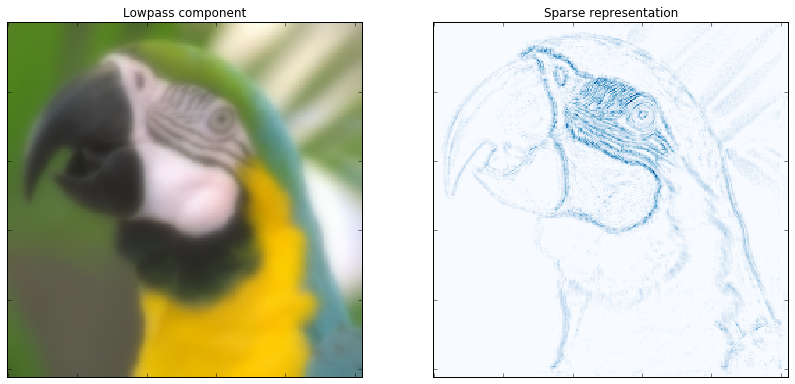

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

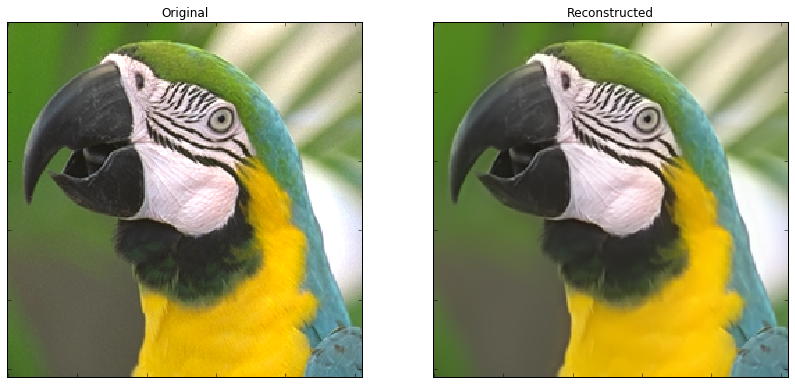

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

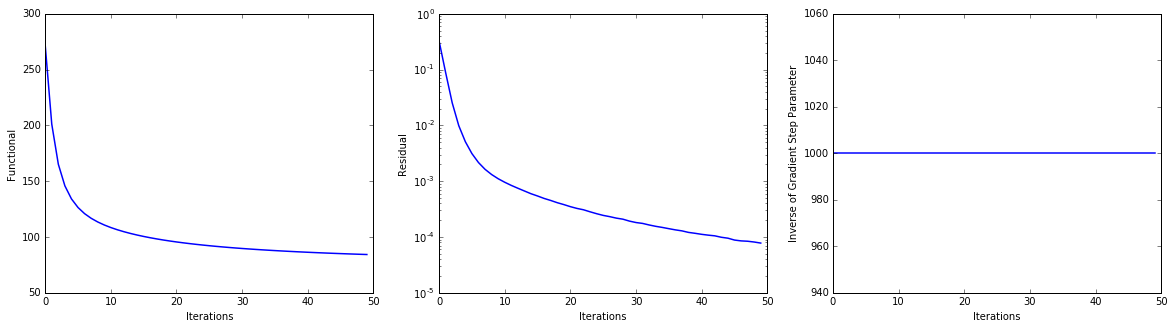

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations',
          ylbl='Inverse of Gradient Step Parameter', fig=fig)
fig.show()